In [28]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')
import seaborn as sns
import pandas as pd
import scipy.stats as stats

In [29]:
df_TOCC = pd.read_csv('../../datasets/TypeOfContractChannel.csv')
df_TOCC[:2]

,id,type_of_contract,type_of_contract2,channel,datetime,Term,payment_type,product,amount,state,overdue_count,overdue,credit rating,bank,cancellation,age,Mileage
0,66758234,렌탈,Normal,서비스 방문,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,9.0,새마을금고,정상,43.0,1862.0
1,66755948,렌탈,Extension_Rental,서비스 방문,2019-10-20,60,카드이체,K1,102900,계약확정,0,없음,2.0,현대카드,정상,62.0,2532.0


### X:범주형 / Y:연속형 : 범주형 따른 상관관계 확인

#### 선정 변수 : channel(항목 2), Mileage\[:500\](정규분포)
- 분석 내용 : channel 중 서비스방문과 홈쇼핑에 따른 마일리지가 평균 차이가 있는가 ?
    - 귀무가설 : 평균에 차이 없다.
    - 가설 : 평균에 차이 있다.
- 분석 결론 (기준 : p-value 0.05)
    - 통계 결론 : 
    - 사실 결론 : 

In [30]:
## 검증 대상 항목만 필터링 and 200개만 추출(정규분포 자료 획득)
condition = (df_TOCC['channel'] == '서비스 방문') | (df_TOCC['channel'] == '홈쇼핑/방송')
df_channel_Mileage = df_TOCC[condition][['channel','Mileage']][:2000]
df_channel_Mileage[:2]

,channel,Mileage
0,서비스 방문,1862.0
1,서비스 방문,2532.0


In [31]:
df_channel_Mileage['channel'].value_counts()

서비스 방문    1079
홈쇼핑/방송     921
Name: channel, dtype: int64

##### 정규성 검증

In [32]:
stats.shapiro(df_channel_Mileage['Mileage'])

ShapiroResult(statistic=nan, pvalue=1.0)

##### 등분산 검증

In [33]:
df_service = df_channel_Mileage[df_channel_Mileage['channel'] == '서비스 방문']
df_service[:2]

,channel,Mileage
0,서비스 방문,1862.0
1,서비스 방문,2532.0


In [34]:
df_homeshopping = df_channel_Mileage[df_channel_Mileage['channel'] == '홈쇼핑/방송']
df_homeshopping[:2]

,channel,Mileage
2,홈쇼핑/방송,2363.0
6,홈쇼핑/방송,2348.0


<AxesSubplot:xlabel='channel', ylabel='count'>

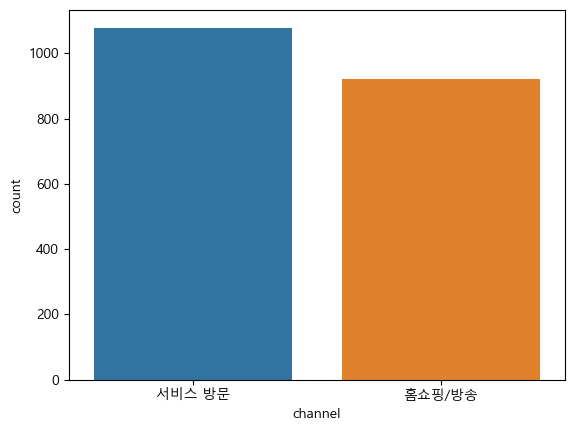

In [45]:
sns.countplot(data=df_channel_Mileage, x='channel')